In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

In [2]:
results = pd.read_csv('../main/log/chull.csv', names=["algo", "experiment_id",  "threshold", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness",
                                                              "elite_size",
                                                              "distance_chull"])

In [3]:
results = results[results.dataset != '50'].reset_index(drop = True)

In [4]:
results.threshold = results.threshold.astype(int)

In [5]:
results.tail()

,algo,experiment_id,threshold,dataset,seed,generation,training_fitness,timing,pop_node_count,test_fitness,elite_size,distance_chull
3363355,STD-GSGP,759c2b99-2efd-11ef-b129-049226d8b1cb,1000,ld50,29,996,2311.022217,0.682420,1013162.0,2476.468018,10116,265377.311283
3363356,STD-GSGP,759c2b99-2efd-11ef-b129-049226d8b1cb,1000,ld50,29,997,2311.001709,0.566145,1014412.0,2476.437744,10162,265375.254385
3363357,STD-GSGP,759c2b99-2efd-11ef-b129-049226d8b1cb,1000,ld50,29,998,2311.000488,0.618158,1015520.0,2476.434082,10173,265375.170999
3363358,STD-GSGP,759c2b99-2efd-11ef-b129-049226d8b1cb,1000,ld50,29,999,2310.992920,0.564192,1016739.0,2476.428467,10173,265374.331933
3363359,STD-GSGP,759c2b99-2efd-11ef-b129-049226d8b1cb,1000,ld50,29,1000,2310.992920,0.455116,1015500.0,2476.428467,10173,265374.331142


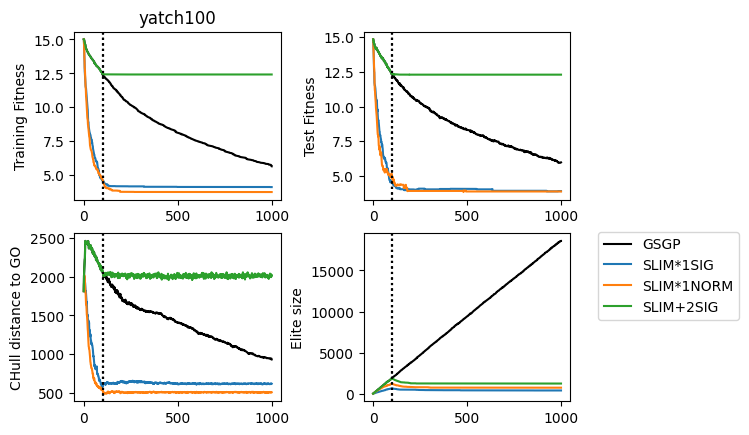

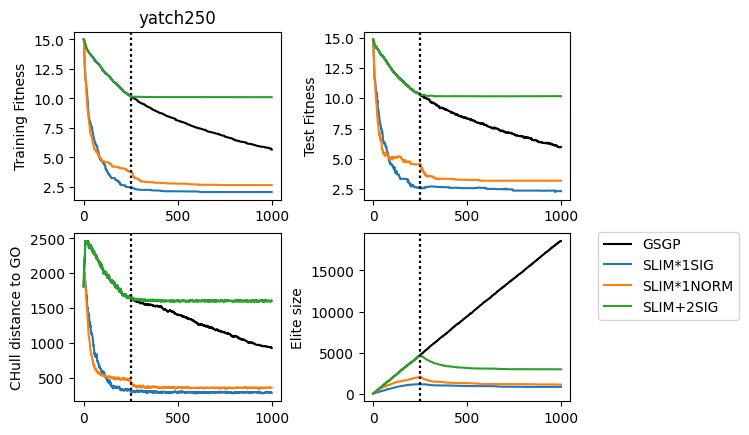

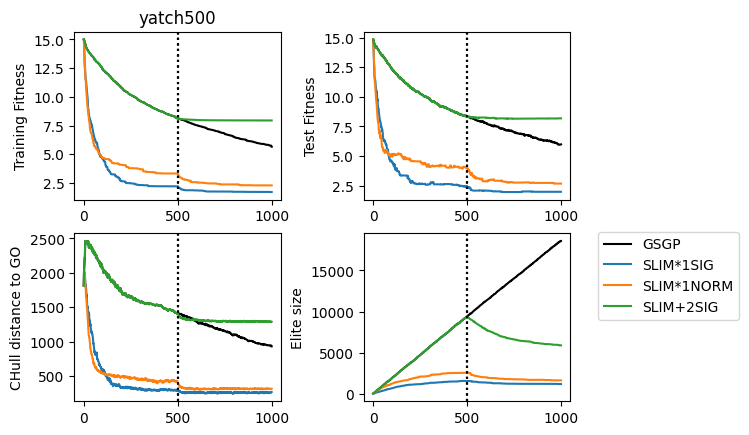

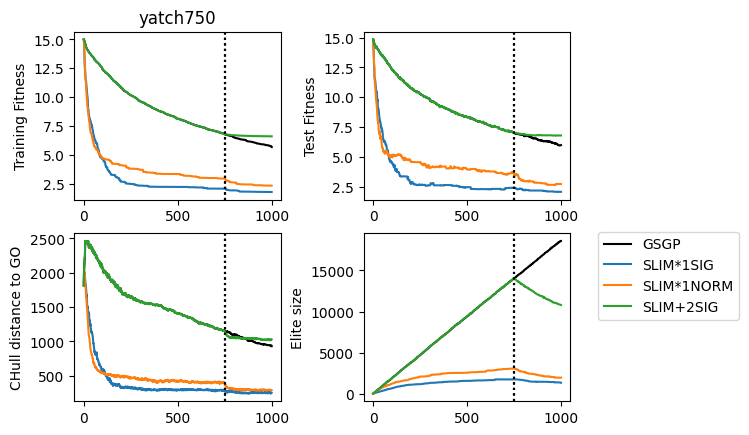

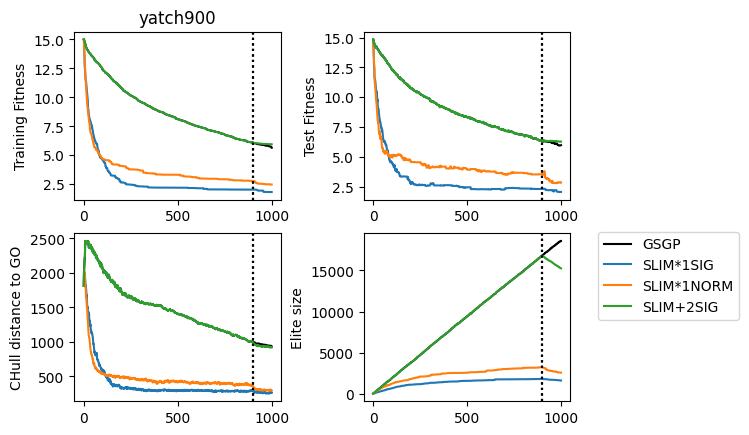

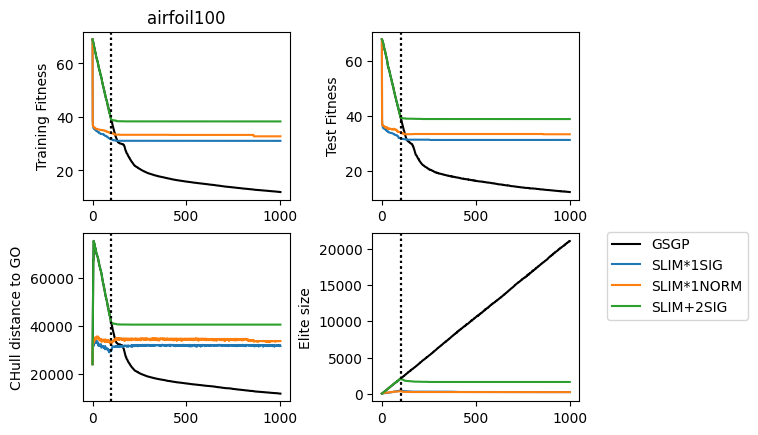

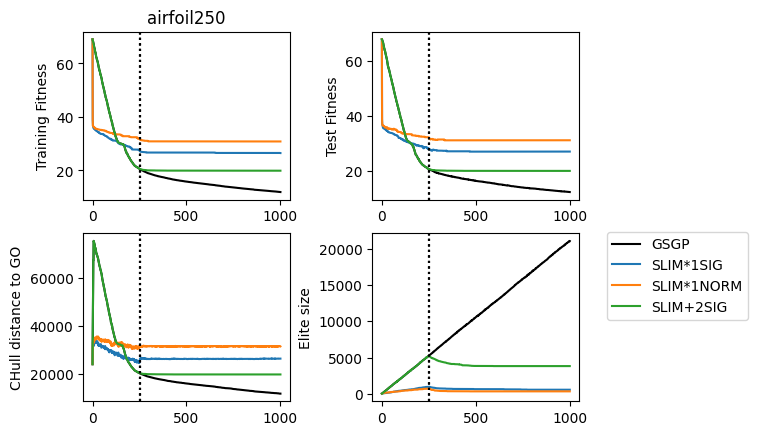

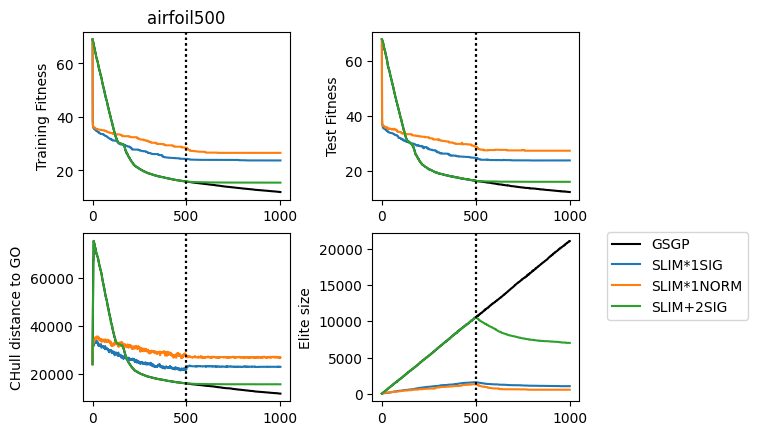

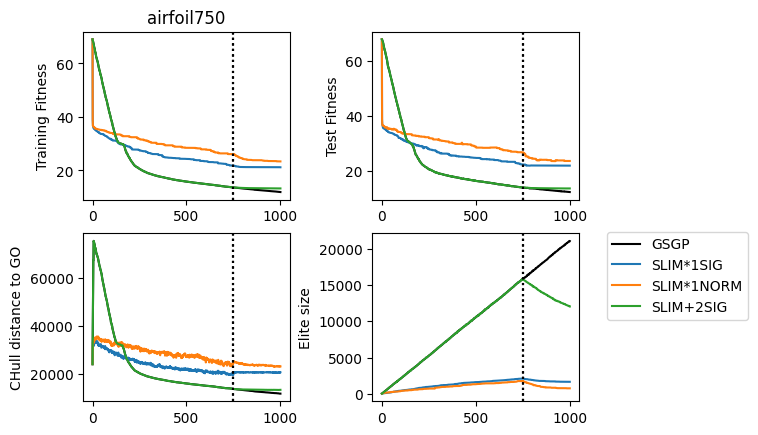

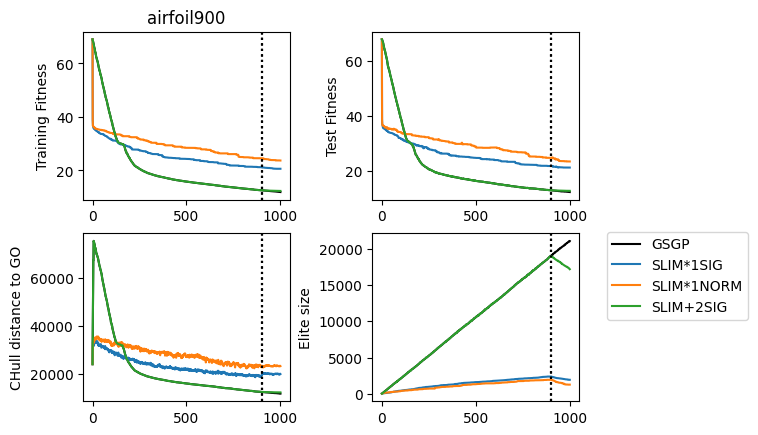

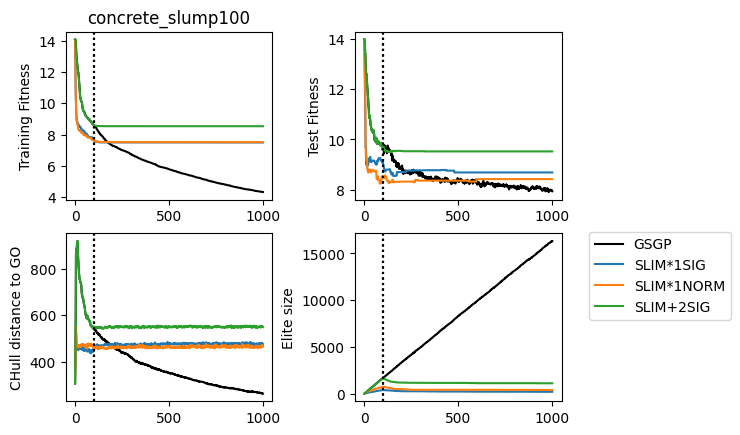

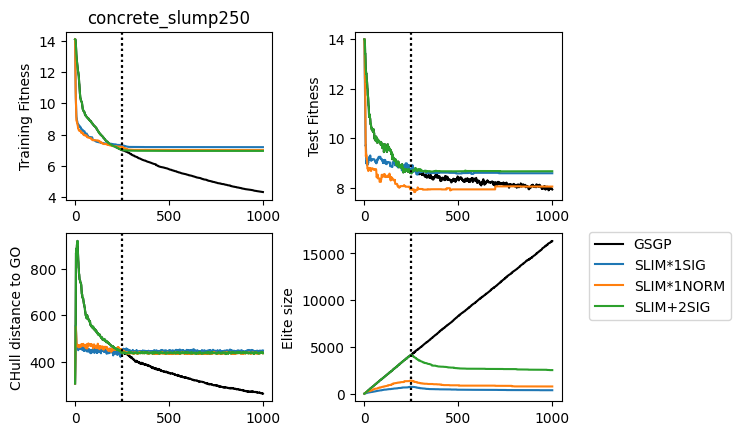

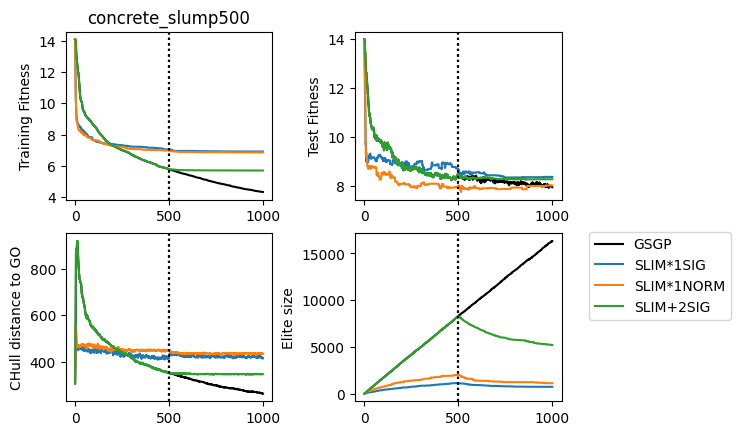

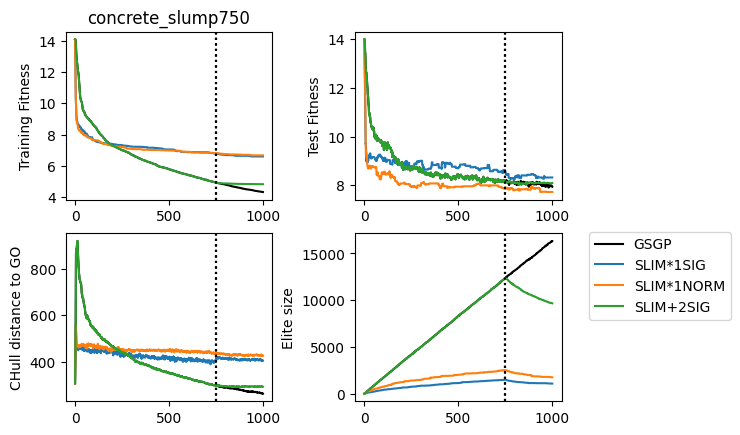

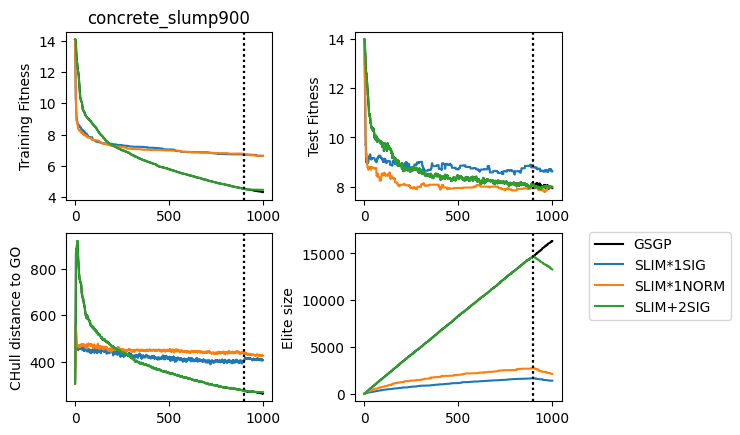

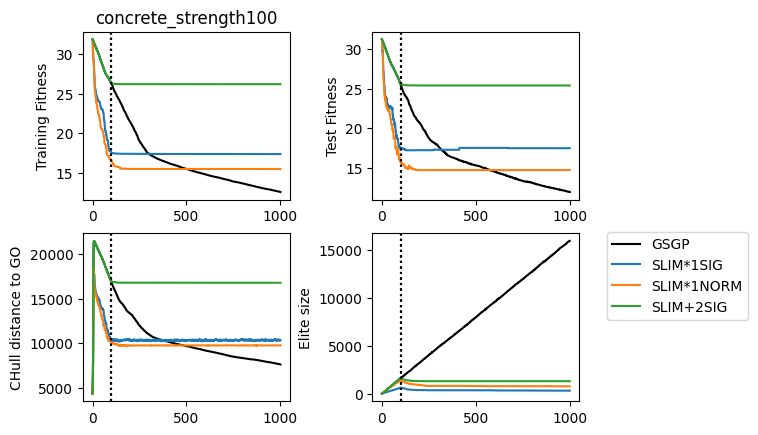

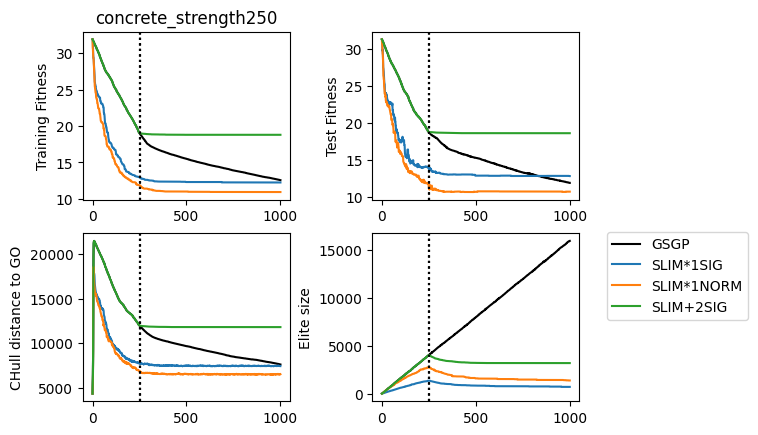

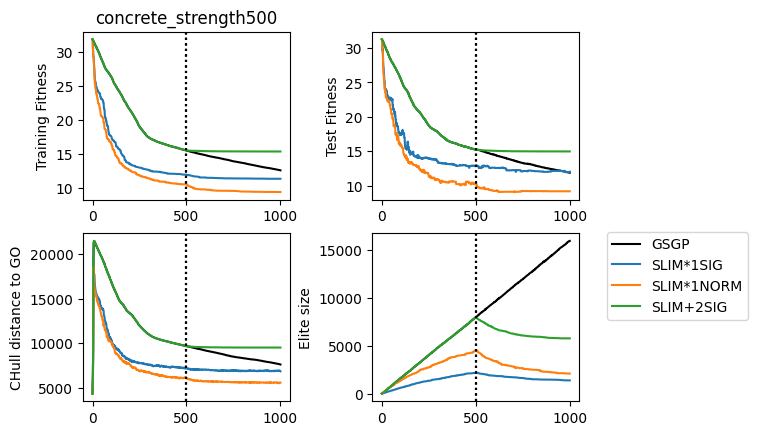

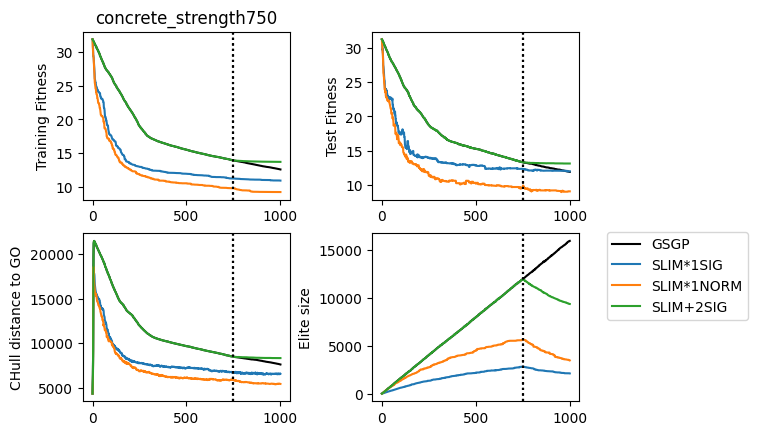

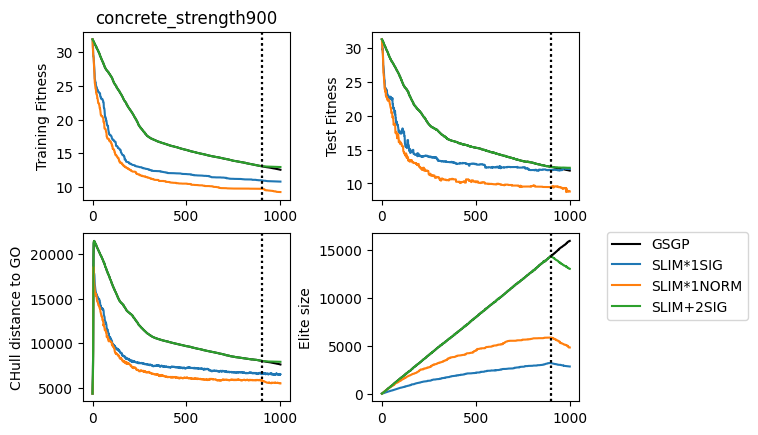

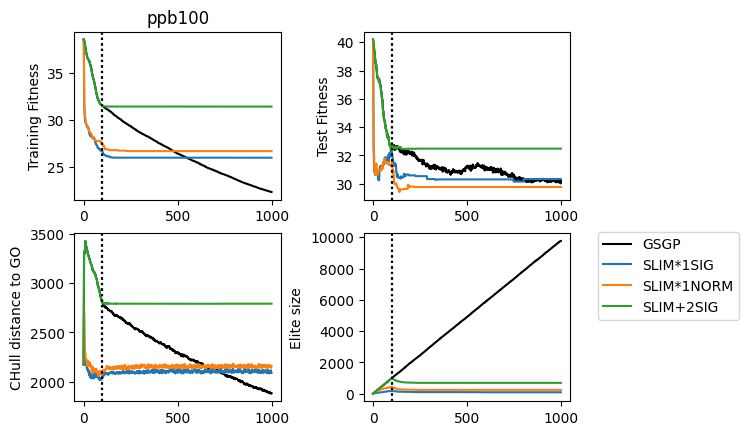

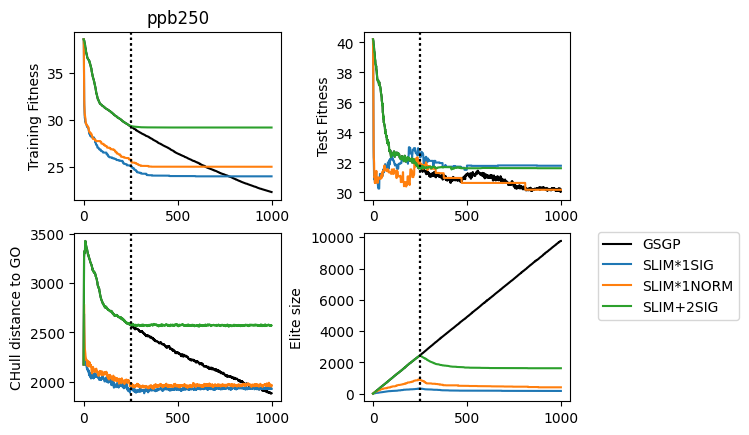

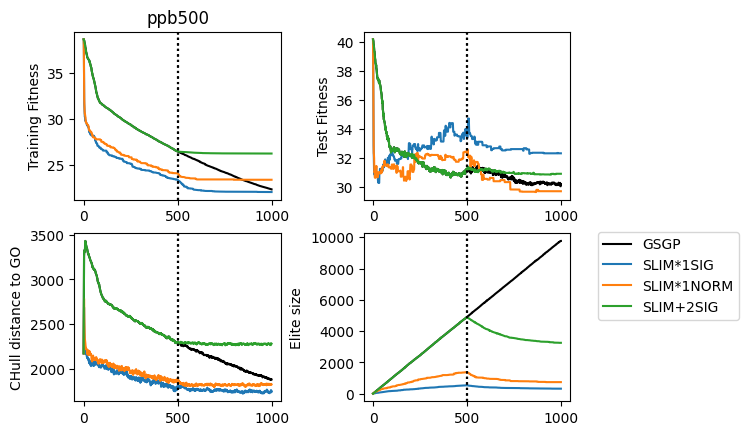

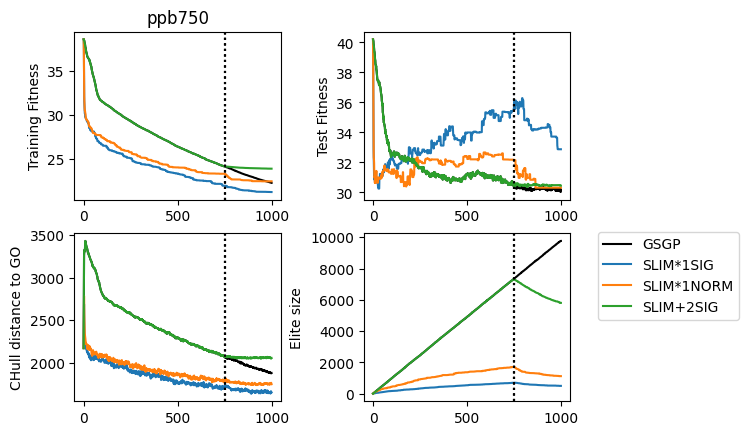

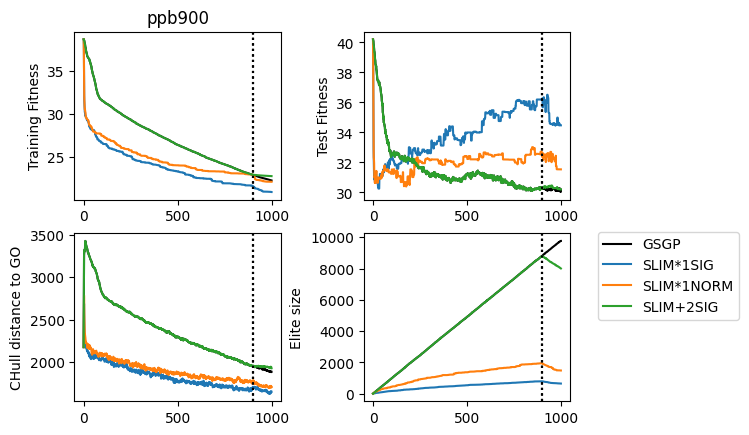

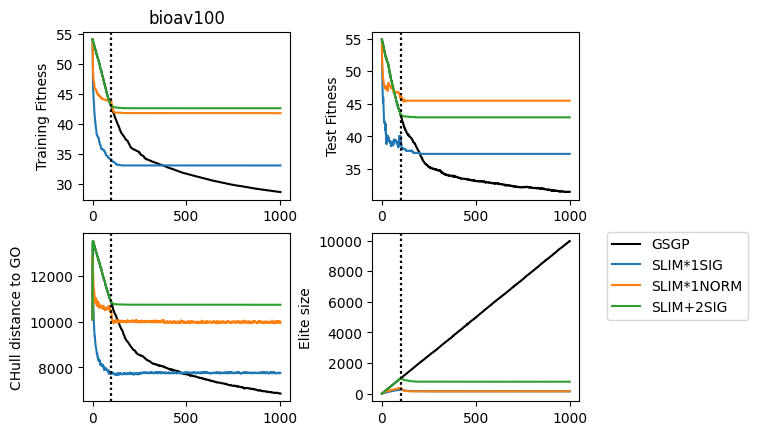

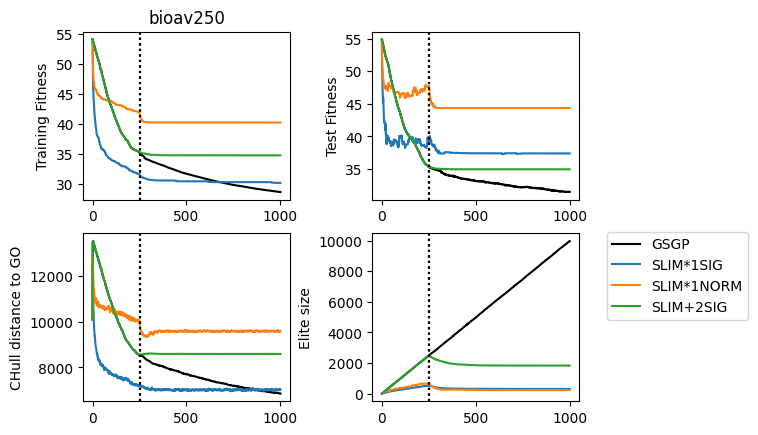

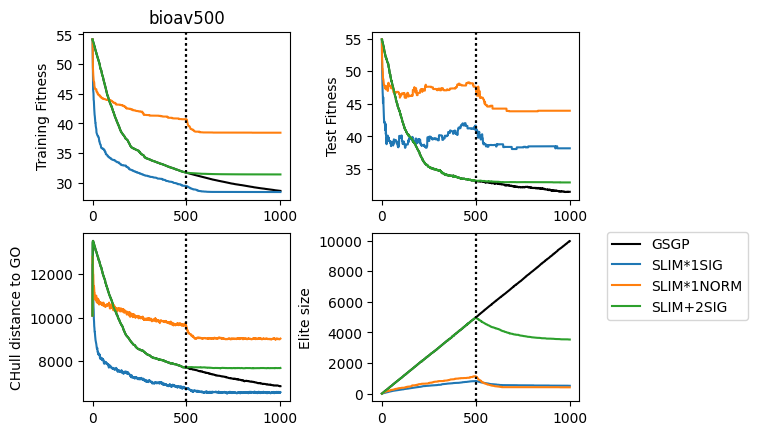

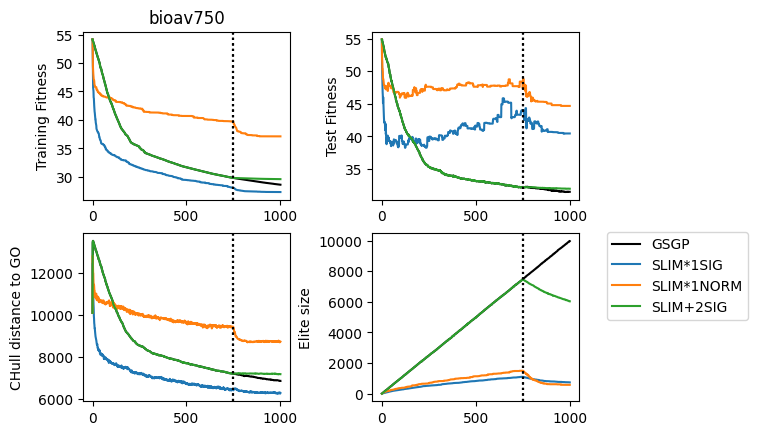

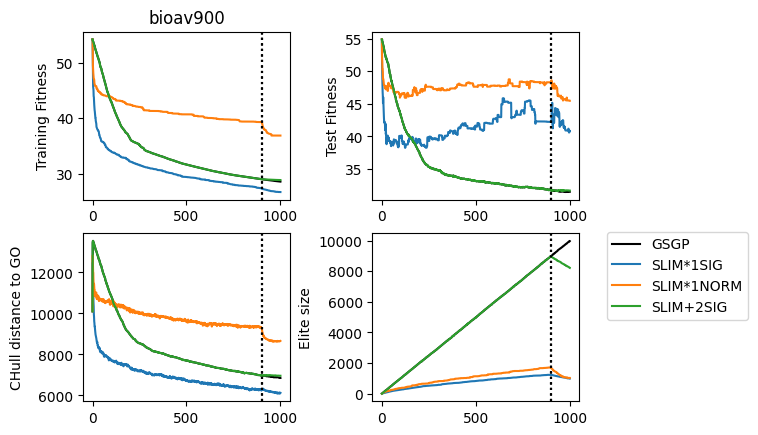

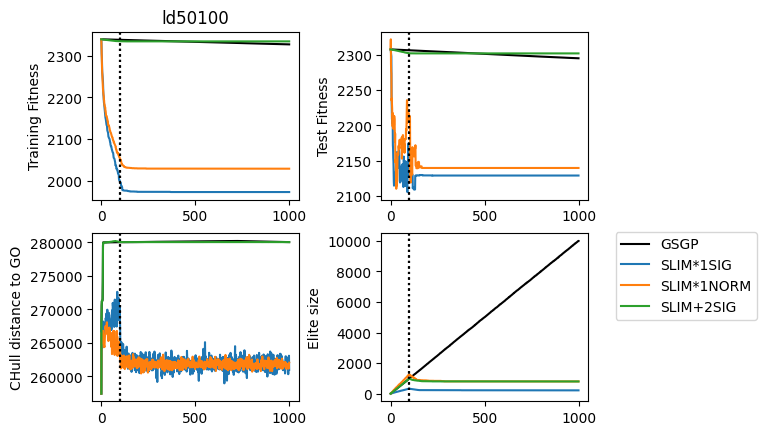

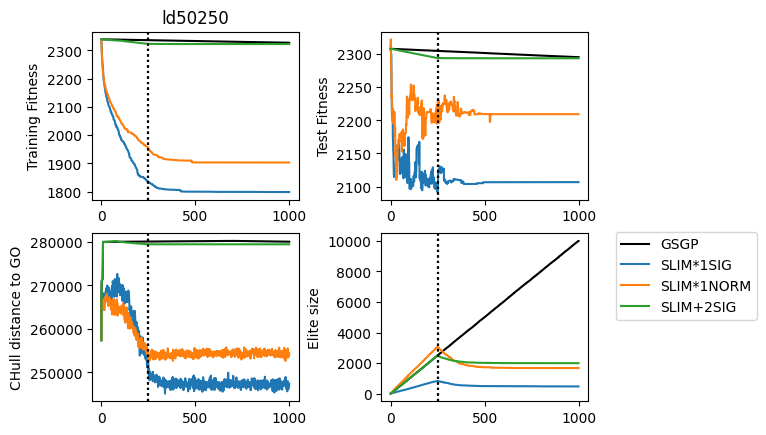

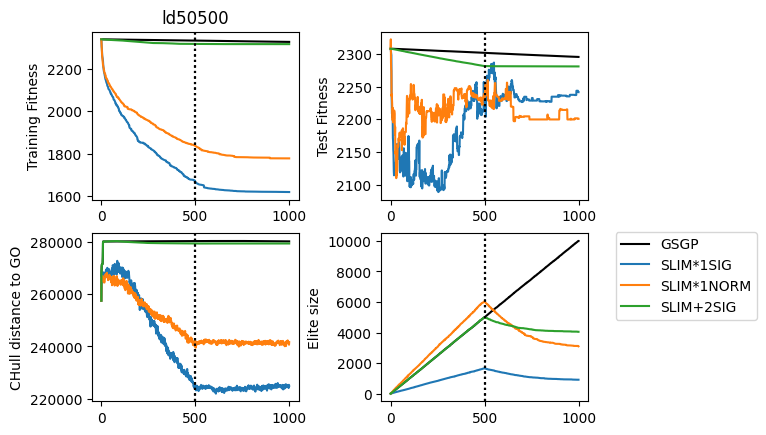

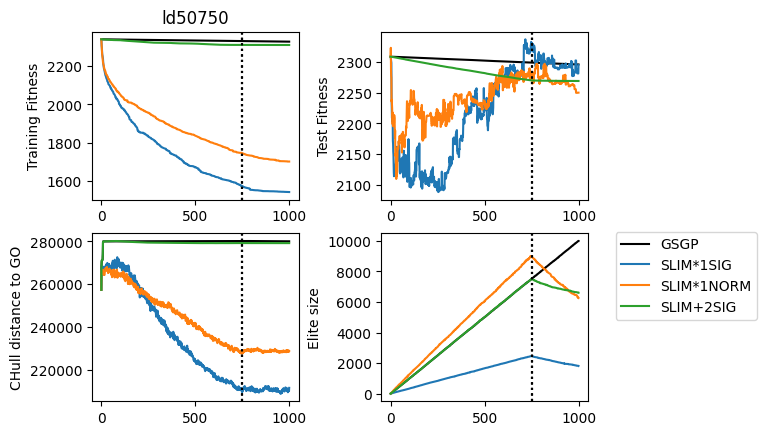

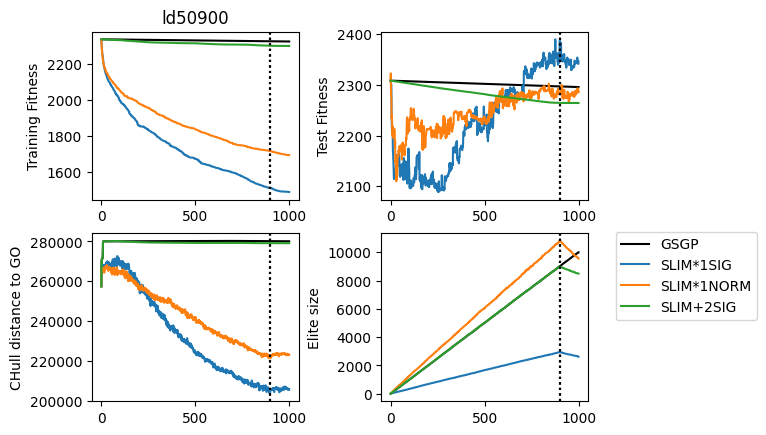

In [7]:
for data in results.dataset.unique():
    gsgp = results.query("algo == 'STD-GSGP' and dataset == @data")[['generation',  "training_fitness","test_fitness", "elite_size", "distance_chull"]].groupby('generation').median()
    for th in [100, 250, 500, 750, 900]:
        gs = gridspec.GridSpec(2, 2)
        gs.update( wspace=0.4)
        pl.figure()
        
        ax1 = pl.subplot(gs[0, 0]) 
        pl.plot(gsgp.index, gsgp['training_fitness'], label = 'GSGP', color = 'black')


        ax2 = pl.subplot(gs[0, 1]) 
        pl.plot(gsgp.index, gsgp['test_fitness'], label = 'GSGP', color = 'black')


        ax3 = pl.subplot(gs[1, 0]) 
        pl.plot(gsgp.index, gsgp['distance_chull'], label = 'GSGP', color = 'black')

        ax4 = pl.subplot(gs[1, 1]) #1,1 
        pl.plot(gsgp.index, gsgp['elite_size'], label = 'GSGP', color = 'black')
        
        for algo in ['SLIM*1SIG', 'SLIM*1NORM', 'SLIM+2SIG']:
        
            
            grouped = results.query("algo == @algo and dataset == @data and threshold == @th")[['generation',  "training_fitness","test_fitness", "elite_size", "distance_chull"]].groupby('generation').median()
        
        
            ax1 = pl.subplot(gs[0, 0]) 
            pl.plot(grouped.index, grouped['training_fitness'], label = algo)
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            ax1.set_ylabel('Training Fitness')


            ax2 = pl.subplot(gs[0, 1]) 
            pl.plot(grouped.index, grouped['test_fitness'], label = algo)
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            ax2.set_ylabel('Test Fitness')
            
            
            ax3 = pl.subplot(gs[1, 0]) 
            pl.plot(grouped.index, grouped['distance_chull'], label = algo)
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            ax3.set_ylabel('CHull distance to GO')
            
            ax4 = pl.subplot(gs[1, 1]) #1,1 
            pl.plot(grouped.index, grouped['elite_size'], label = algo)
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')
#             ax3.set_ylim(0, 3000)
            ax4.set_ylabel('Elite size')
            



        ax1.set_title(data + str(th))
        ax4.legend(bbox_to_anchor=(1.1, 1.05))
        plt.show()